# Factor analysis using PEER

## Overview

This workflow performs [Probabilistic Estimation of Expression Residuals (PEER) method](https://github.com/PMBio/peer/wiki/Tutorial), a method also used for GTEx eQTL data analysis. 

## Input

1. Molecular phenotype in `bed.gz` file format with indexing:

In [4]:
readr::read_delim("data/example_data.bed.gz",show_col_types= F)[1:3,1:8]

#chr start end gene_name Sample1    Sample2   Sample3     Sample4  
1 1      1   100 Gene1      -1.627455  1.684725  -0.0807924  1.510522
2 1    101   200 Gene2     -12.626715 17.746163 -14.2519447  5.254536
3 1    201   300 Gene3       3.337390 -7.259074   6.2643526 -1.375911

2. A covariate file in text format with the first column `#id` that lists the name of all covariates, followed by other columns each being a sample with sample names matching that in the molecular phenotype file:

In [2]:
readr::read_delim("data/example_cov.txt",show_col_types= F)[,1:8]

#id  Sample1    Sample2   Sample3   Sample4    Sample5   Sample6   
1 Cov1  1.6243454 -2.301539  1.462108 -1.0998913 -1.100619 -0.6837279
2 Cov2 -0.6117564  1.744812 -2.060141 -0.1724282  1.144724 -0.1228902
  Sample7   
1 -0.6916608
2 -0.3967535

Covariates file is optional to the PEER method but it should be supplied in order to construct a proper PEER model in the context of xQTL mapping.

## Outputs

### Main outputs

* `*.PEER.cov`: result for peer factor covariates

### Other outputs

* A diagnosis polt for check of convergence
* peer precision /residuals /weights

## Number of factors to use

By default the pipeline applies recommendations from [GTEx](https://gtexportal.org/home/documentationPage):

> A set of covariates identified using the Probabilistic Estimation of Expression Residuals (PEER) method (Stegle et al., PLoS Comp. Biol., 2010 ), calculated for the normalized expression matrices (described below). For eQTL analyses, the number of PEER factors was determined as function of sample size (N): 15 factors for N<150, 30 factors for 150≤ N<250, 45 factors for 250≤ N<350, and 60 factors for N≥350, as a result of optimizing for the number of eGenes discovered. For sQTL analyses, 15 PEER factors were computed for each tissue.

Although one can specify fixed number of factors using `--N` option in this pipeline.

## Minimal working example
An MWE is uploaded to [google drive](https://drive.google.com/drive/folders/1yjTwoO0DYGi-J9ouMsh9fHKfDmsXJ_4I?usp=sharing).
The singularity image (sif) for running this MWE is uploaded to [google drive](https://drive.google.com/drive/folders/1mLOS3AVQM8yTaWtCbO8Q3xla98Nr5bZQ)

Because the MWE only contains 10 genes but 400+ samples. The computed N will be far greater than the number of genes. Therefore in the MWE the N is fixed to be 3.

In [ ]:
sos run pipeline/PEER_factor.ipynb PEER \
   --cwd output \
   --phenoFile ALL.log2cpm.bed.chr12.mol_phe.bed.gz  \
   --container containers/PEER.sif  \
   --N 3

In [5]:
tree ./output

./output
├── MWE.Cov_PEER.PEER.cov
├── MWE.Cov_PEER.PEER.cov.stderr
├── MWE.Cov_PEER.PEER.cov.stdout
├── MWE.Cov_PEER.PEER_diagnosis.pdf
├── MWE.Cov_PEER.PEER.peer_precisions.txt
├── MWE.Cov_PEER.PEER.peer_residuals.txt
└── MWE.Cov_PEER.PEER.peer_weights.txt

0 directories, 7 files


> ./peer_output/example_data.bed_diagnosis_plot.jpeg (22.2 KiB):

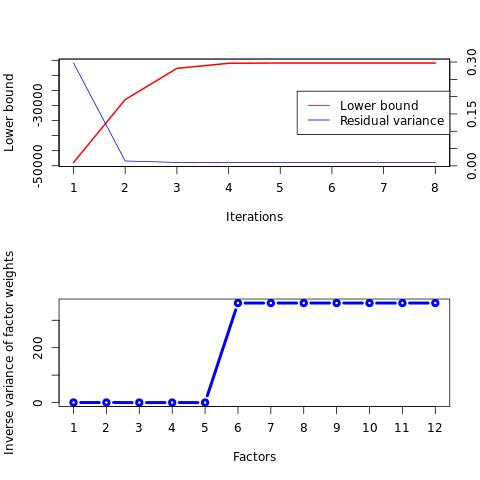

>>> ./peer_output/example_data.bed_diagnosis_plot.jpeg:

bash: ./peer_output/example_data.bed_diagnosis_plot.jpeg: Permission denied


In [3]:
%preview ./output/MWE.Cov_PEER.PEER_diagnosis.pdf -s png

In [11]:
cat ./output/MWE.Cov_PEER.PEER.cov.stdout

PEER: loading input data... PEER: loading covariate file ...done!
PEER: Input summary: 200 samples with 100 genes and 2 covariates 
Setting initialization parameters ...Done.
PEER: estimating hidden confounders (30)
	iteration 0/1000
	iteration 1/1000
	iteration 2/1000
	iteration 3/1000
	iteration 4/1000
	iteration 5/1000
Converged (var(residuals)) after 5 iterations

Exporting results ... Done.


## MWE with PCA input
In our pipeline, it is designed to include the pca as part of our cov input. This can be achieved by the merge_covariate step

**FIXME: complete MWE**

## Command interface

In [3]:
sos run PEER_factor.ipynb -h

usage: sos run PEER_factor.ipynb [workflow_name | -t targets] [options] [workflow_options]
  workflow_name:        Single or combined workflows defined in this script
  targets:              One or more targets to generate
  options:              Single-hyphen sos parameters (see "sos run -h" for details)
  workflow_options:     Double-hyphen workflow-specific parameters

Workflows:
  PEER

Global Workflow Options:
  --cwd VAL (as path, required)
                        The output directory for generated files. MUST BE FULL
                        PATH
  --phenoFile VAL (as path, required)
                        The molecular phenotype matrix
  --covFile VAL (as path, required)
                        The covariate file
  --job-size 1 (as int)
                        For cluster jobs, number commands to run per job
  --walltime 5h
                        Wall clock time expected
  --mem 16G
                        Memory expected
  --numThreads 8 (as int)
                        Numbe

## Implementation

In [42]:
[global]
# The output directory for generated files. MUST BE FULL PATH
parameter: cwd = path("output")
# Phenotype File
parameter: phenoFile = path
# For cluster jobs, number commands to run per job
parameter: job_size = 1
# Wall clock time expected
parameter: walltime = "5h"
# Memory expected
parameter: mem = "16G"
# Number of threads
parameter: numThreads = 8
# Software container option
parameter: container = ""
# N PEER factors, If do not specify or specified as 0, default values suggested by 
# GTEx (based on different sample size) will be used
parameter: N = 0
# Default values from PEER software:
## The number of max iteration
parameter: iteration = 1000
### Prior parameters
#parameter: Alpha_a = 0.001
#parameter: Alpha_b = 0.1
#parameter: Eps_a = 0.1
#parameter: Eps_b = 10.0
# Tolarance parameters
parameter: tol = 0.001
#parameter: var_tol = 0.00001
# minimum variance explained criteria to drop factors while training
parameter: r2_tol = False
# Convergence mode: Convergence mode for MOFAr "slow", "medium" or "fast", corresponding to 1e-5%, 1e-4% or 1e-3% deltaELBO change.
parameter: convergence_mode = "fast"

In [ ]:
[PEER_1]
input: phenoFile
output: f'{cwd:a}/{_input:bnn}.PEER_MODEL.hd5'
task: trunk_workers = 1, walltime = walltime, mem = mem, cores = numThreads, tags = f'{step_name}_{_output[0]:bn}'
python: container=container, expand= "${ }", stderr = f'{_output[0]}.stderr', stdout = f'{_output[0]}.stdout'
    from mofapy2.run.entry_point import entry_point
    import pandas as pd
    import os
    ## Force the number of threads used in numpy.
    os.environ["OMP_NUM_THREADS"] = "${numThreads}" # export OMP_NUM_THREADS=4
    os.environ["OPENBLAS_NUM_THREADS"] = "${numThreads}" # export OPENBLAS_NUM_THREADS=4 
    os.environ["MKL_NUM_THREADS"] = "${numThreads}" # export MKL_NUM_THREADS=6
    import numpy as np
    ## Data
    data = pd.read_csv(${_input:r},"\t",index_col = 3).drop(["#chr","start","end"],axis = 1)
    # initialise the entry point
    ent = entry_point()
    # Guess number of factor
    # Suggest the number of factors to use if no input value
    num_factor = ${N}
    if num_factor == 0:
        if len(data.columns) < 150:
            num_factor = 15
        elif len(data.columns) < 250:
            num_factor = 30
        elif len(data.columns) < 350:
            num_factor = 45
        else:
            num_factor = 60
    # Set data
    # MOFA is a multi-view and multi-group inference framework. 
    # If usig only a single view and a single group (as in PEER), the data needs to be embedded into a nested list
    ent.set_data_matrix([[data.transpose()]],samples_names=[data.columns.values.tolist()], features_names=[data.index.values.tolist()])
    ent.set_model_options(factors= num_factor , spikeslab_weights=False, ard_weights=False)
    ent.set_train_options(iter=${iteration}, convergence_mode="${convergence_mode}" ${f',dropR2 = {r2_tol}' if r2_tol else "" }, startELBO=1, freqELBO=1,tolerance=${tol}, gpu_mode=False, verbose=True, seed=42)
    ent.build()
    ent.run()
    ent.save(${_output:ar})

In [ ]:
[PEER_2]
output: f'{cwd:a}/{_input:bnn}.PEER.gz', f'{cwd:a}/{_input:bnn}.PEER.diag.pdf'
task: trunk_workers = 1, walltime = walltime, mem = mem, cores = numThreads, tags = f'{step_name}_{_output[0]:bn}'
R:  container=container, expand= "${ }", stderr = f'{_output[0]}.stderr', stdout = f'{_output[0]}.stdout'
    ####################
    ## Load libraries ##
    ####################
    
    library(MOFA2)
    library(dplyr)
    library(readr)
    ################
    ## Load model ##
    ################
    
    file <- "${_input}"
    model <- load_model(file)
    
    ####################################
    ## (Optional) add sample metadata ##
    ####################################
    
    # Important: 
    # (1) the row names in the sample metadata data.frame have to match the sample names in the MOFA model
    # (2) the sample name has to contain at least two columns: 
    # 		- sample: sample names
    #		- group: group name. Only required for multi-group inference. In your case just set the entire column to the same value
    
    # Load metadata
    
    # stopifnot(all(samples(model)[[1]]==metadata$sample))
    # samples_metadata(model) <- metadata
    
    ###############################
    ## (Optional) Subset factors ##
    ###############################
    
    # We can remove factors that explain little variance (in this case, we require at least 0.01%)
    # r2 <- model@cache$variance_explained$r2_per_factor
    # factors <- sapply(r2, function(x) x[,1]>0.0001)
    # model <- subset_factors(model, which(apply(factors,1,sum) >= 1))
    
    # fetch factors in matrix format, with dimensions (nfactors,nsamples)
    factors <- get_factors(model)[[1]]
    dim(factors)
    factors = as_tibble(t(factors),rownames = "#id")
    factors%>%write_delim("${_output[0]}","\t") 
    # Plot save to vcf
    pdf("${_output[1]}")
    #############################
    ## Plot variance explained ##
    #############################
    
    # Plot variance explained using individual factors
    plot_variance_explained(model, factors="all")
    plot_variance_explained(model, factors=c(1,2,3))
    
    # Plot total variance explained using all factors
    plot_variance_explained(model, plot_total = TRUE)[[2]]
    
    ########################
    ## Plot factor values ##
    ########################
    
    plot_factor(model, factor = 1)
    plot_factors(model, factor = c(1,2))
    
    ###########################
    ## Plot feature loadings ##
    ###########################
    
    # The weights or loadings provide a score for each gene on each factor. 
    # Genes with no association with the factor are expected to have values close to zero
    # Genes with strong association with the factor are expected to have large absolute values. 
    # The sign of the loading indicates the direction of the effect: a positive loading indicates that the feature is more active in the cells with positive factor values, and viceversa.
    
    # Plot the distribution of loadings for Factor 1.
    plot_weights(model,
      view = 1,
      factor = 1,
      nfeatures = 10,     # Top number of features to highlight
      scale = T           # Scale loadings from -1 to 1
    )
    
    # If you are not interested in the full distribution, but just on the top loadings:
    plot_top_weights(model, 
      view = 1, 
      factor = 1, 
      nfeatures = 10,
      scale = T
    )
    
    ######################################
    ## Plot correlation between factors ##
    ######################################
    
    plot_factor_cor(model)
    
    ###################
    ## Fetch factors ##
    ###################
    invisible(dev.off())
      

## Reference:
* Codes are adapted from [here](https://github.com/RTIInternational/biocloud_docker_tools/blob/master/peer/v1.3/run_peer.R)
* GTEx recommandation of PEER factors is [here](https://gtexportal.org/home/documentationPage)
* Examples by PEER is at [github](https://github.com/PMBio/peer/wiki/Tutorial)